In [18]:
!wget -O dataset.zip 'https://drive.google.com/uc?id=1jZhGtNhc7NAOnT7hJhEROuHRz7O-zGov'
!unzip /content/dataset.zip -d /content/

--2023-11-12 21:52:44--  https://drive.google.com/uc?id=1jZhGtNhc7NAOnT7hJhEROuHRz7O-zGov
Resolving drive.google.com (drive.google.com)... 74.125.142.138, 74.125.142.113, 74.125.142.102, ...
Connecting to drive.google.com (drive.google.com)|74.125.142.138|:443... connected.
HTTP request sent, awaiting response... 303 See Other
Location: https://doc-0o-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/53dhofh490ecub918proafjg2rehli7t/1699825950000/15796337810467136215/*/1jZhGtNhc7NAOnT7hJhEROuHRz7O-zGov?uuid=bf360396-dff7-447a-852b-430dc320df53 [following]
--2023-11-12 21:52:45--  https://doc-0o-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/53dhofh490ecub918proafjg2rehli7t/1699825950000/15796337810467136215/*/1jZhGtNhc7NAOnT7hJhEROuHRz7O-zGov?uuid=bf360396-dff7-447a-852b-430dc320df53
Resolving doc-0o-5o-docs.googleusercontent.com (doc-0o-5o-docs.googleusercontent.com)... 172.253.117.132, 2607:f8b0:400e:c0a::84
Connecting to doc-0

In [19]:
import cv2
import numpy as np
import os
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [20]:
images = []
im_num = 1
labels = ['!', '!', '!', '!', '!', '!', '!', '!', '!', '!',
          '?', '?', '?', '?', '?', '?', '?', '?', '?', '?',
          '%', '%', '%', '%', '%', '%', '%', '%', '%', '%']

# преобразуем labels в числовые значения, чтобы можно было их передать в OneHotEncoding
label_mapping = {'!': 0, '?': 1, '%': 2}
numeric_labels = np.array([label_mapping[label] for label in labels])

# преобразуем картинки в векторы

for im_num in range(1, 31):
    img = np.invert(cv2.imread(f"symbols/sym_{im_num}.png")[:, :, 0])
    images.append(img)

images = np.array(images)
labels = np.array(labels)


In [21]:
# создаем обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(images, numeric_labels, test_size=0.2, random_state=42)


# Создаем модель и добавляем слои
model = tf.keras.models.Sequential()

# слои помеченные комментарием нельзя удалять, без них модель не будет работать.
# остальные слои добавлены для улучшения модели. С ними можно "играться"

model.add(tf.keras.layers.Flatten(input_shape=(28,28,1))) # обязательный слой
model.add(tf.keras.layers.Dense(128, activation = "relu")) # обязательный слой
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(3, activation='softmax')) # обязательный слой


# нормализуем входные данные
X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

# передаем выходные данные в OneHotEncoding
y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test), verbose = False)
model.save('symbol.model')

1/1 [==============================] - 0s 149ms/step - loss: 0.1475 - accuracy: 1.0000
Test loss: 0.1474664956331253
Test accuracy: 1.0
1/1 [==============================] - 0s 105ms/step
True Label: %
Predicted Label: %



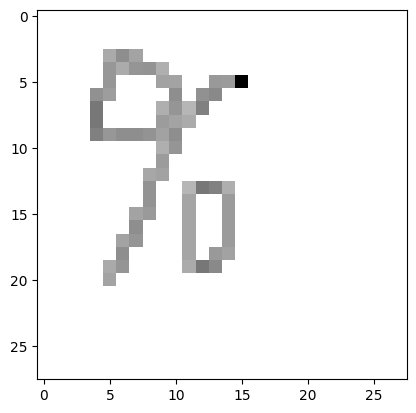

True Label: ?
Predicted Label: ?



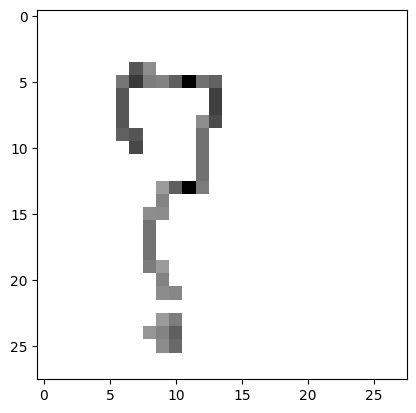

True Label: %
Predicted Label: %



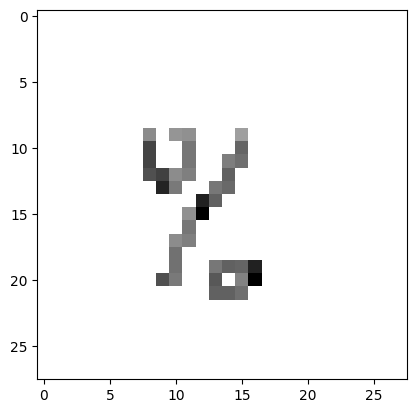

True Label: ?
Predicted Label: ?



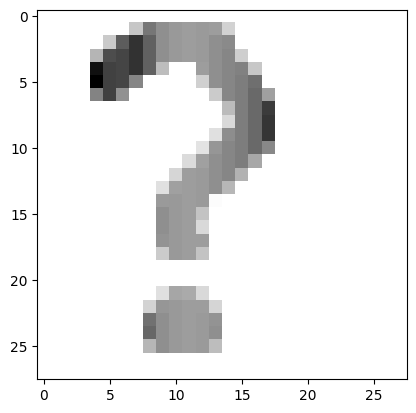

True Label: !
Predicted Label: !



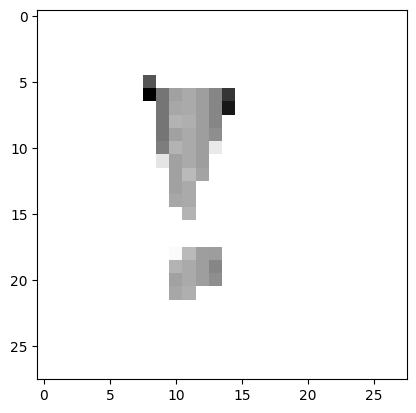

True Label: !
Predicted Label: !



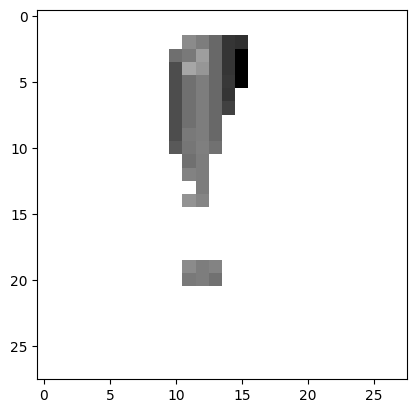

In [22]:
model = tf.keras.models.load_model('symbol.model')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

predictions = model.predict(X_test)

for i in range(len(predictions)):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(y_test[i])


  print(f"True Label: {list(label_mapping.keys())[list(label_mapping.values()).index(true_label)]}")
  print(f"Predicted Label: {list(label_mapping.keys())[list(label_mapping.values()).index(predicted_label)]}\n")


  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.show()


Посмотрим, как будет вести себя модель, если поменять соотношения тестовой и обучающей выборки на test_size = 0.3

In [23]:
X_train, X_test, y_train, y_test = train_test_split(images, numeric_labels, test_size=0.3, random_state=42)

model = tf.keras.models.Sequential()

model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dropout(0.2))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test), verbose = False)

model.save('symbols.model')



1/1 [==============================] - 0s 142ms/step - loss: 0.2787 - accuracy: 0.8889
Test loss: 0.2787186801433563
Test accuracy: 0.8888888955116272
1/1 [==============================] - 0s 61ms/step
True Label: %
Predicted Label: %



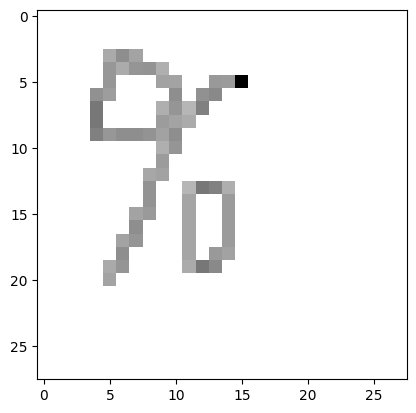

True Label: ?
Predicted Label: ?



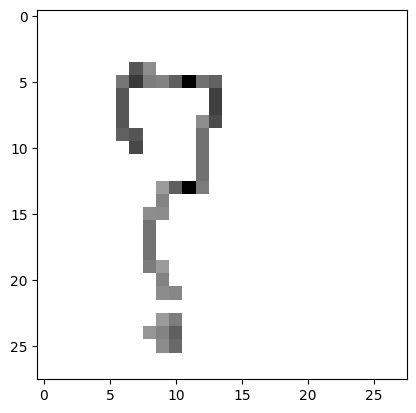

True Label: %
Predicted Label: %



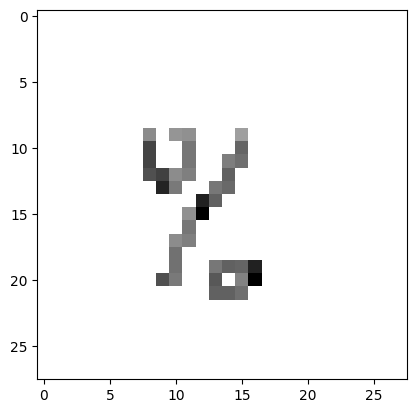

True Label: ?
Predicted Label: ?



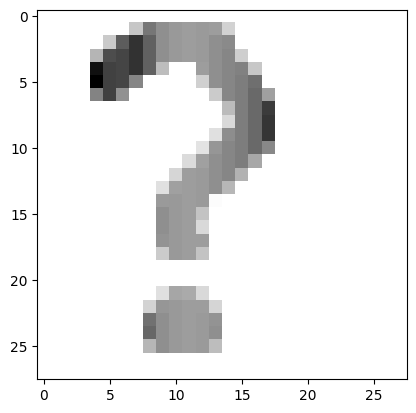

True Label: !
Predicted Label: !



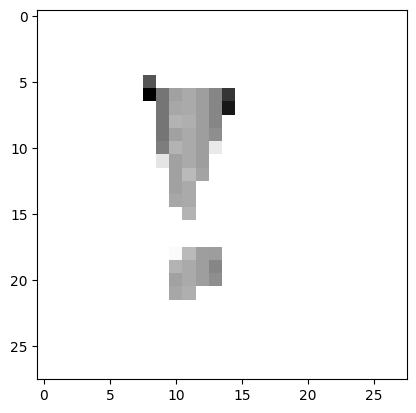

True Label: !
Predicted Label: !



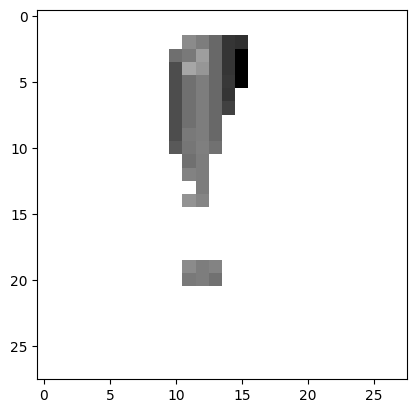

True Label: %
Predicted Label: %



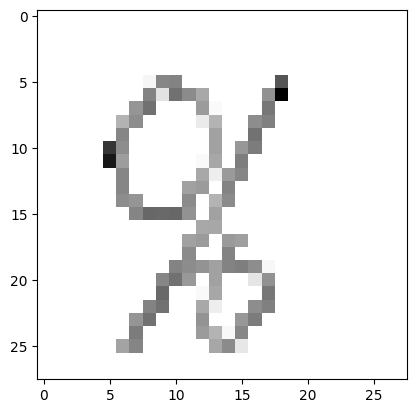

True Label: %
Predicted Label: %



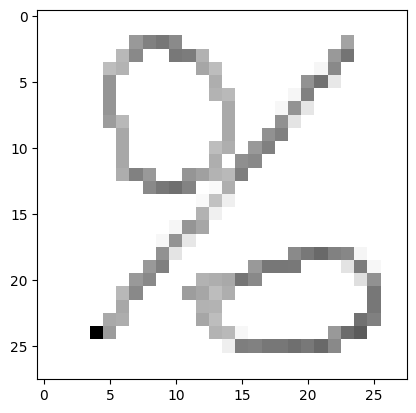

True Label: ?
Predicted Label: !



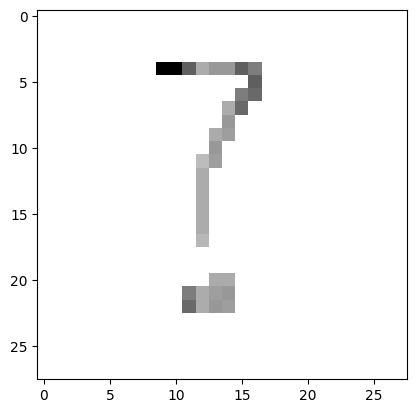

In [24]:
model = tf.keras.models.load_model('symbols.model')

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

predictions = model.predict(X_test)

for i in range(len(predictions)):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(y_test[i])


  print(f"True Label: {list(label_mapping.keys())[list(label_mapping.values()).index(true_label)]}")
  print(f"Predicted Label: {list(label_mapping.keys())[list(label_mapping.values()).index(predicted_label)]}\n")


  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.show()


Попробуем оставить test_size = 0.3 и убрать два слоя Dropout и Dense.

1/1 [==============================] - 0s 30ms/step - loss: 0.4311 - accuracy: 0.7778
Test loss: 0.43114688992500305
Test accuracy: 0.7777777910232544
1/1 [==============================] - 0s 55ms/step
True Label: %
Predicted Label: %



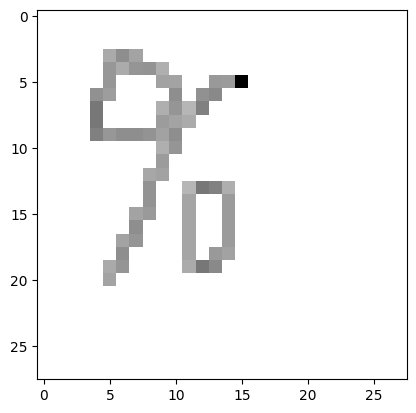

True Label: ?
Predicted Label: ?



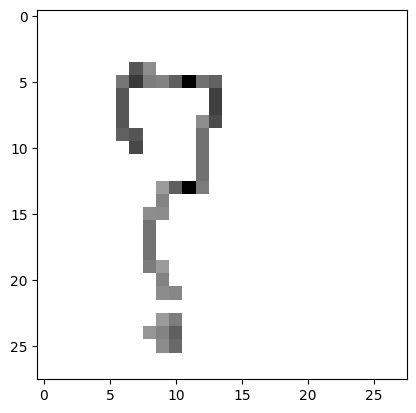

True Label: %
Predicted Label: %



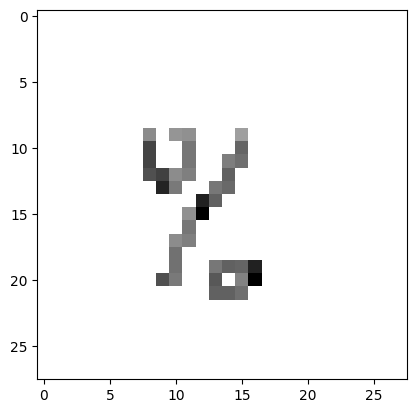

True Label: ?
Predicted Label: ?



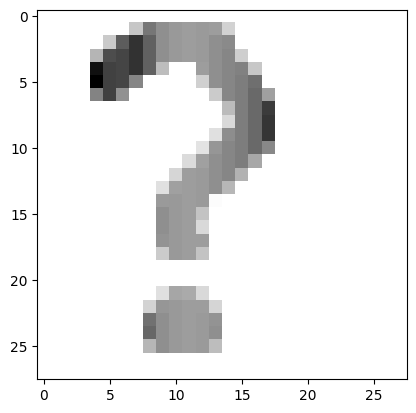

True Label: !
Predicted Label: !



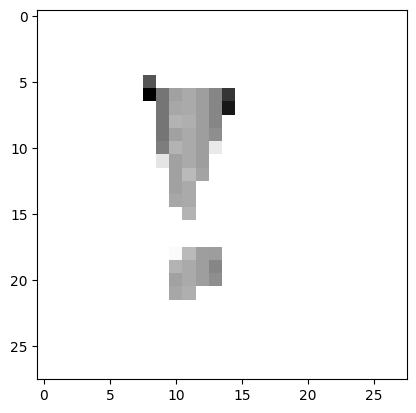

True Label: !
Predicted Label: !



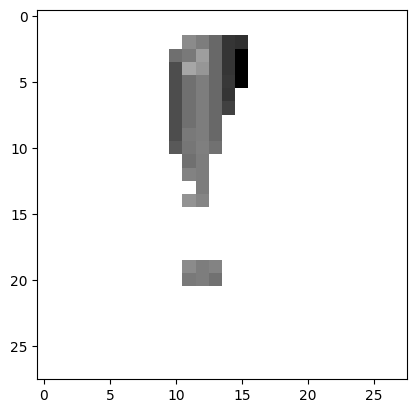

True Label: %
Predicted Label: %



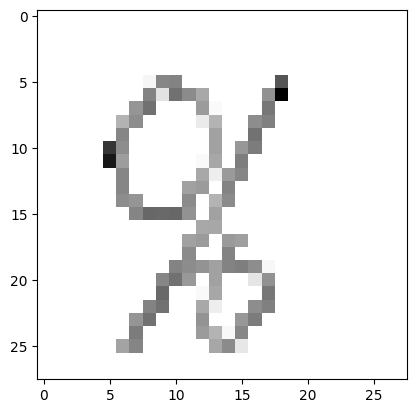

True Label: %
Predicted Label: ?



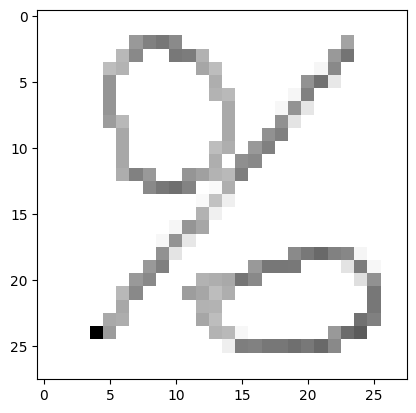

True Label: ?
Predicted Label: !



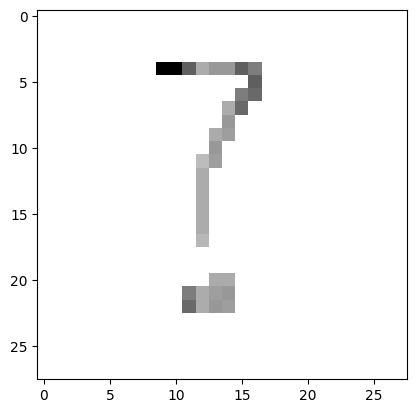

In [25]:
X_train, X_test, y_train, y_test = train_test_split(images, numeric_labels, test_size=0.3, random_state=42)

model = tf.keras.models.Sequential()


model.add(tf.keras.layers.Flatten(input_shape=(28,28,1)))
model.add(tf.keras.layers.Dense(128, activation = "relu"))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

X_train = tf.keras.utils.normalize(X_train, axis = 1)
X_test = tf.keras.utils.normalize(X_test, axis = 1)

y_train = tf.keras.utils.to_categorical(y_train, 3)
y_test = tf.keras.utils.to_categorical(y_test, 3)

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs = 1000, validation_data=(X_test, y_test), verbose = False)

loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test loss: {loss}")
print(f"Test accuracy: {accuracy}")

predictions = model.predict(X_test)

for i in range(len(predictions)):
  predicted_label = np.argmax(predictions[i])
  true_label = np.argmax(y_test[i])


  print(f"True Label: {list(label_mapping.keys())[list(label_mapping.values()).index(true_label)]}")
  print(f"Predicted Label: {list(label_mapping.keys())[list(label_mapping.values()).index(predicted_label)]}\n")


  plt.imshow(X_test[i], cmap=plt.cm.binary)
  plt.show()
